# Analysing my post activity on Facebook
### Inspired by https://www.dataquest.io/blog/analyze-facebook-data-python/

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

Firstly we neet to load the data using pandas read_json function

In [51]:
df = pd.read_json('your_posts_1.json')
df.head(3)

,timestamp,data,title,attachments,tags
0,2021-06-08 09:48:57,[{'post': '#bioinformatyka #python Hej! Czy zn...,Paulina Komorek dodaÅa post w grupie Programu...,NaN,NaN
1,2021-06-08 09:34:44,[{'post': 'Hej! Czy znacie jakieÅ kursy/szkol...,Paulina Komorek dodaÅa post w grupie Biotechn...,NaN,NaN
2,2021-04-17 14:08:00,[{'post': 'Hej! Czy ktoÅ ma moÅ¼e nowe zdjÄc...,Paulina Komorek dodaÅa post w grupie Jasna In...,NaN,NaN


In [ ]:
We also need to modify the original data to meet our requirements

In [52]:
df.rename(columns={'timestamp': 'date'}, inplace = True) 
df = df[df['data'].apply(lambda x: True if isinstance(x, list) and len(x)>0 and 'post' in x[0] else False)]
df['data'] = df['data'].apply(lambda x: x[0]['post'])
df = df.drop(['attachments', 'title', 'tags'], axis = 1)
pd.to_datetime(df['date'])
df.head(4)

,date,data
0,2021-06-08 09:48:57,#bioinformatyka #python\nHej! Czy znacie jakie...
1,2021-06-08 09:34:44,Hej! Czy znacie jakieÅ kursy/szkolenia/szkoÅ...
2,2021-04-17 14:08:00,Hej! Czy ktoÅ ma moÅ¼e nowe zdjÄcia?
3,2021-04-10 10:21:53,"Hej! JeÅli ktoÅ chciaÅby pomÃ³c pani, ktÃ³r..."


Now we are setting index and resampling the data to quantify the number of posts per year

In [54]:
df = df.set_index('date')
post_counts = df['data'].resample('Y').size()
post_counts

date
2010-12-31     29
2011-12-31    123
2012-12-31    144
2013-12-31     54
2014-12-31     28
2015-12-31     33
2016-12-31     37
2017-12-31     15
2018-12-31     44
2019-12-31     38
2020-12-31      8
2021-12-31      6
Freq: A-DEC, Name: data, dtype: int64

We are using previously prepared data to draw the first bar chart representing the number of posts per year

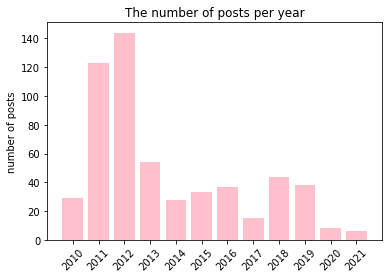

In [55]:
plt.bar(post_counts.index.strftime("%Y"), post_counts, color = 'pink')
plt.xticks(rotation=45)
plt.title('The number of posts per year')
plt.ylabel('number of posts')
pass

We can also use resampling function to count the number of question mark per year. It will determine the number of asked questions

In [ ]:
question_mark_count = df['data'].apply(lambda x: x.count('?'))
df['question_mark_count'] = question_mark_count
questions_counts = df['question_mark_count'].resample('Y').sum()

We are using previously prepared data to draw the bar chart representing the number of asked questions per year


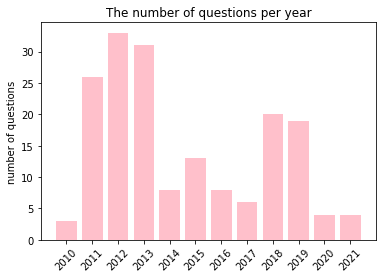

In [56]:
plt.bar(questions_counts.index.strftime("%Y"), questions_counts, color = 'pink')
plt.xticks(rotation=45)
plt.title('The number of questions per year')
plt.ylabel('number of questions')
pass

We were also wondering when the word 'python' was first mentioned in my facebook post activity.

In [57]:
contain_python = df[df['data'].str.contains('python')]
first_mentioned = contain_python.tail(1).index.to_pydatetime()[0].strftime('%d/%m/%Y')
print('The \'python\' was firstly mentioned on ' + first_mentioned)


The 'python' was firstly mentioned on 08/06/2021
